<a href="https://colab.research.google.com/github/AmishiR/ML-Lab/blob/main/Lab_04_Logistic_Regression_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 **<font color='blue'><b>Lab-04 Logistic Regression</b></font>**

Welcome to the **Logistic Regression Lab**! In this lab exercise we will:

1.   Implement logistic regression to **classify binary outcomes** using one or more features.
2.   Build the **sigmoid** hypothesis $h_\theta(x)=\sigma(\theta^\top x)$
3. Derive and code the **vectorized cost and gradient** (with and without **regularization**)
4. train the model via **gradient descent**, and **visualize decision boundaries** on the given dataset.
5. Generate predictions, and assess **accuracy** of the trained model.

In this Lab we'll implement logistic regression and apply it to a classification task. We'll also improve the robustness of our implementation by adding regularization to the training algorithm. and testing it on a more difficult problem.

---
## 📖  **<font color='blue'><b>Part 1: Logistics Regression**

In this section, we'll build a logistic regression model to predict whether a student gets admitted to a university.

### 📊 Problem Statement
You are the administrator of a university department and need to estimate each applicant’s chance of admission using their scores on two entrance exams. You are given historical data from past applicants: For each training example, you have the applicant's scores on two exams and the admissions decision  (admitted/not admitted).
Your task is to build a logistic regression classifier that learns from this data and outputs the probability of admission for a new applicant based on their exam scores. You will implement the hypothesis $$h_\theta(x)=\sigma(\theta^\top x) = \frac{1}{1 + e^{\theta^\top x}} $$ Compute the vectorized cost and gradient, fit the model via gradient descent, and evaluate its accuracy on the training set.
The data is in `ex2data1.csv`.


# **<font color='blue'><b>**Let's start by importing libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 📈 **<font color='blue'><b>**Dataset Visualization**

Let’s load and plot the dataset to understand the relationship.

In [ ]:
data = pd.read_csv("/content/ex2data1.csv",names=['Score1','Score2','Admitted'])

In [ ]:
# print first few rows of your data
data.head(10)


,Score1,Score2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [ ]:
data.shape

(100, 3)

In [ ]:
data.describe()

,Score1,Score2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<font color='green'>**Let's create a scatter plot of the two scores and use color coding to visualize if the example is positive (admitted) or negative (not admitted).**<font>

Text(0, 0.5, 'Score of Exam-2')

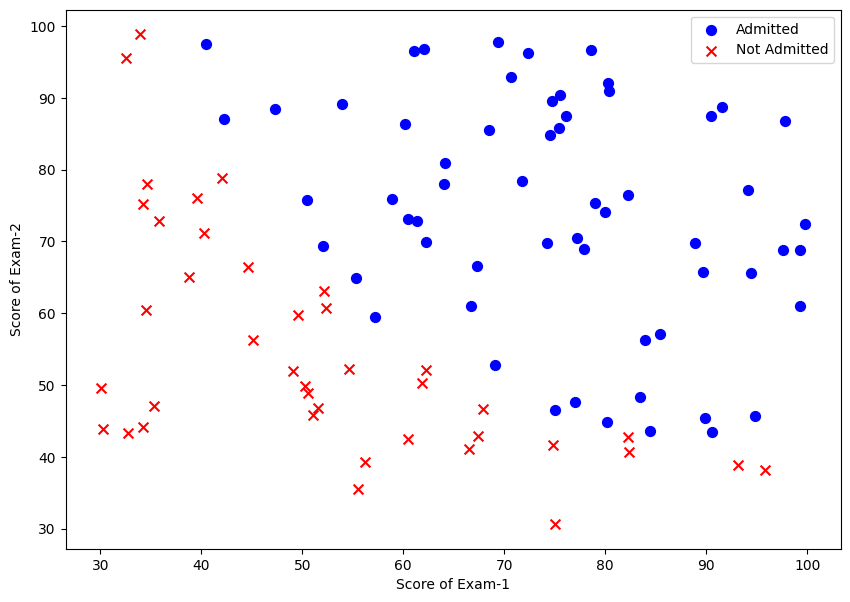

In [ ]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(positive['Score1'], positive['Score2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Score1'], negative['Score2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Score of Exam-1')
ax.set_ylabel('Score of Exam-2')

*It looks like there is a clear decision boundary between the two classes. Now we need to implement logistic regression so we can train a model to predict the outcome*

# <font color='green'> <font>**Prepare the data for vectorized implemenation**
**Now we need to do some setup, similar to what we did in Lab-2 for linear regression.**

In [ ]:
#insert a column of ones at the zeroth index in the dataframe
ones=np.ones(100)
data.insert(0,'ones',ones)


In [ ]:
# check shape of data
data.shape

(100, 4)

In [ ]:
# print first few rows of your data
data.head(5)


,ones,Score1,Score2,Admitted
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


In [ ]:
# Assign features column to variable X  and target variable (Admitted column) to y
colms = data.shape[1]
X = data.iloc[:, 0:colms-1]
y = data.iloc[:, colms-1:colms]

In [ ]:
# convert to X and y to numpy arrays and initalize the parameter array theta
X =np.array(X)
y =np.array(y)
theta = np.zeros((3))

In [ ]:
#Let's quickly check the shape of our arrays to make sure everything looks good.
X.shape


(100, 3)

In [ ]:
y.shape

(100, 1)

In [ ]:
theta.shape

(3,)

#<font color='green'>**Now we need to create a sigmoid function. The code for this is pretty simple.**  $$\sigma(z)=\frac{1}{1+e^{-z}} $$

In [ ]:
def sigmoid(z):
    """
    sigmoid σ(z) = 1 / (1 + exp(-z)).
    Works with scalars or NumPy arrays.
    ----------
    z : float or np.ndarray Input value(s).
    Returns np.ndarray or float Sigmoid applied elementwise to z.
    """
    # write the code for the expression of the logistic function at the return statement for element wise exponential value
    return 1/(1+np.exp(-z))

<font color='green'>**Let's do a quick sanity check to make sure the function is working.**<font>

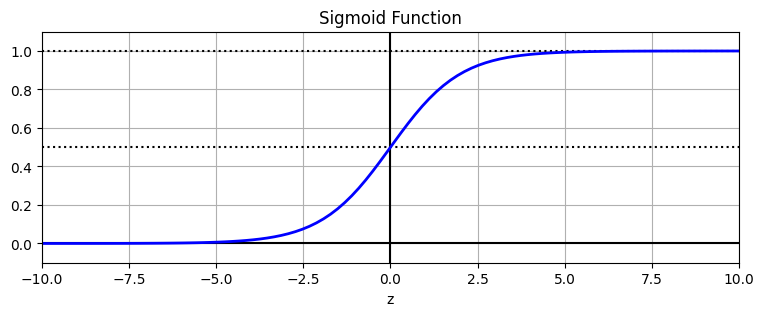

In [ ]:
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "b-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Sigmoid Function')
plt.grid()
plt.show()


---

## 🔢 Cost Function

The objective of logisctic regression is to minimize the cost function:
### Cost Function

$$J(\theta)
= -\frac{1}{m}\sum_{i=1}^{m}
\Big(
y^{(i)} \log h_\theta(x^{(i)}) +
(1 - y^{(i)}) \log \big(1 - h_\theta(x^{(i)})\big)
\Big)$$

### Hypothesis Function
$h_\theta(x^{(i)})=\sigma(\theta^\top x)= \sigma(z)=\frac{1}{1+e^{-z}} $ is the hypothesis.
where  $ z= \theta^\top x^{(i)} = \theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} $

### ✏️ Exercise: compute_cost

Complete the function below to compute cost.

<font color='green'>**Excellent! Now we need to write the cost function to evaluate a solution.**<font>

---

## 🔢 Gradient Function

The gradient of the cost is a vector of the same length as $\theta$ where $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:

$$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$

Vectorized:
$\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$


Complete the function below to compute gradient.

In [ ]:
# ========== TODO: Compute Cost ==========
def compute_cost(theta,X, y):
    """
    Compute cost for linear regression
    Arguments:
    X : feature matrix (m x 3)
    y : target vector (m x 1)
    theta : parameter vector (3,) or (3,1)
    eps : float, optional
        Small constant to stabilize log at 0/1.
    """
    m = len(y)
    eps=1e-12
    theta =np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    # ====================YOUR CODE HERE==========================
    hx=sigmoid(X*theta.T)
    first = np.multiply(y,np.log(hx+eps))
    second=np.multiply((1-y),np.log(1-hx+eps))
    cost=np.sum(first+second)/-m
    # ============================================================
    return cost

J(θ)=−1m∑i=1m(y(i)loghθ(x(i))+(1−y(i))log(1−hθ(x(i))))


**Below is a simple test cell to check your cost function. Run this to verify your output matches the expected value.**

In [ ]:
# === Test ===
# Test cost at initial theta
theta_test = np.zeros((3)) # Initialize as a NumPy array
cost = compute_cost(theta_test,X, y)
expected = 0.6931471805599453  # Example expected cost value
# Check if the cost is a pandas Series and extract the value
if isinstance(cost, pd.Series):
    cost = cost.iloc[0] # Assuming the first element is the cost value
assert np.isclose(cost, expected), f"Cost function error: {cost} != {expected}"
print('✅ Cost function test passed.')

✅ Cost function test passed.


<font color='green'>**Now let's compute the cost for our initial solution (0 values for theta).**<font>

In [ ]:
cost = compute_cost(theta,X, y)
print(cost)

0.6931471805579453


<font color='green'>**Looks good. Next we need a function to compute the gradient (parameter updates) given our training data, labels, and some parameters theta.**<font>

In [ ]:
def gradient(theta,X, y):
  theta =np.matrix(theta)
  X = np.matrix(X)
  y = np.matrix(y)
  # ====================YOUR CODE HERE==========================
  h=sigmoid(X@theta.T)
  error=(h-y)
  grad = (1/m)*X.T@error
  #============================================================
  return grad

Vectorized:
$\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (sigma(X\theta)-y)$


<font color='green'>**Note that we don't actually perform gradient descent in this function - we just compute a single gradient step. In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients. Since we're using Python, we can use SciPy's "optimize" namespace to do the same thing.**<font>

**Let's look at a single call to the gradient method using our data and initial paramter values of 0.**

In [ ]:
gradient(theta,X,y)

matrix([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]])

**Now we can use SciPy's truncated newton (TNC) implementation to find the optimal parameters.**

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X, y))
print(result)

(array([-25.16131855,   0.20623159,   0.20147149]), 36, 0)


**Let's see what the our cost looks like with this solution.**

In [ ]:
# Print the optimal theta parameters and the cost.
print("Optimal values of Theta")
theta = result[0]
print(theta)
print("\n Cost calculated using optimal values of theta")
print(compute_cost(theta,X,y))

Optimal values of Theta
[-25.16131855   0.20623159   0.20147149]

 Cost calculated using optimal values of theta
0.20349770158803498


**Next we need to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.**

In [ ]:
def predict(theta, X):
  theta = np.matrix(theta)
  probability =sigmoid(X@theta.T)
  predicted =probability>=0.5
  return predicted

In [ ]:
predictions = predict(theta, X)
correct  =  predictions == y
acc=(np.sum(correct)/len(correct))*100
accuracy = (sum(map(int, correct))%len(correct))
print("Accuracy: {0}%".format(accuracy))
print("Accuracy: {0}%".format(acc))

Accuracy: 89%
Accuracy: 89.0%


/tmp/ipython-input-2172085598.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = (sum(map(int, correct))%len(correct))


**Our logistic regression classifer correctly predicted if a student was admitted or not 89% of the time. Not bad! Keep in mind that this is training set accuracy though. We didn't keep a hold-out set or use cross-validation to get a true approximation of the accuracy so this number is likely higher than its true perfomance (this topic is covered in a later exercise).**

# Plot the Decision Boundary
<font color='green'>**Plot the decision boundary on the training data, using the optimal θ values.**<font color='green'>

Use the model to predict whether a particular student will be admitted. For a student with a Score-1 of 45 and a Score-2 of 85, it is expected an admission probability of 0.776. Another way to evaluate the quality of the parameters is to see how well the learned model predicts on the training set. Create a predict function that will produce “1” or “0” predictions given a dataset and a learned parameter vector θ. Finally, report the training accuracy of the classifier by computing the percentage of examples it got correct.

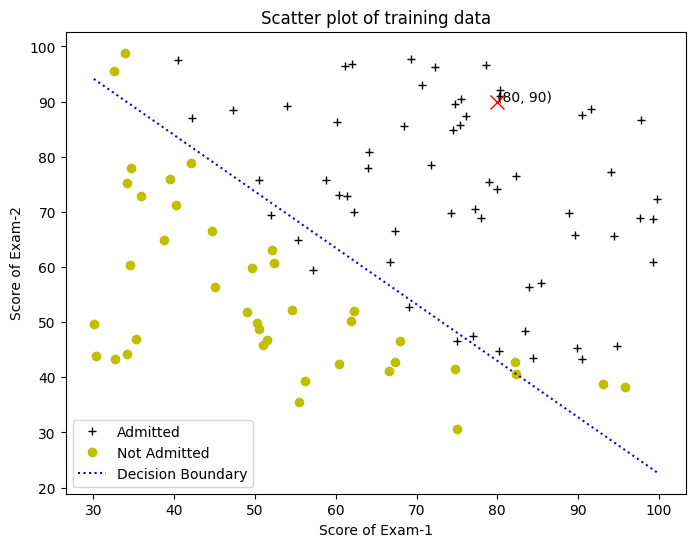

Admission probability for scores (80, 90)= 0.9999228469421362


In [ ]:
# Only 2 points are required to define a line, e.g. min and max.

plot_X = np.array([np.min(X[:,1]),np.max(X[:,1])])
plot_y =-(theta[0]+theta[1]*plot_X)/theta[2]

plt.figure(figsize=(8, 6))
plt.xlabel('Score of Exam-1')
plt.ylabel('Score of Exam-2')
plt.title('Scatter plot of training data')
plt.plot(data['Score1'][data['Admitted']==1],
         data['Score2'][data['Admitted']==1], 'k+',
         label='Admitted')
plt.plot(data['Score1'][data['Admitted']==0],
         data['Score2'][data['Admitted']==0], 'yo',
         label='Not Admitted')
plt.plot(plot_X, plot_y, 'b:', label='Decision Boundary')
plt.plot(80, 90, 'xr', ms=10)
plt.annotate('(80, 90)', xy=(80, 90), xytext=(80, 90))
plt.legend()
plt.show()

probability = sigmoid(np.dot(np.array([1, 80, 90]), theta))
print('Admission probability for scores (80, 90)=', probability)

# Using scikit-learn

**Although we implemented these algorithms from scratch, it's worth noting that we could also use a high-level python library like scikit-learn to solve this problem.**

In [ ]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(X, y.ravel())

LogisticRegression()

In [ ]:
model.score(X,y)

0.8305084745762712

**The accuracy is much lower than what we just computed, but keep in mind this result is using the default parameters provided by scikit-learn.  We'd likely need to do some parameter tuning to get the same accuracy that we obtained with our earlier result.**

**That's all for Lab-04! Stay tuned for the next Lab where we'll tackle multi-class image classification.**